<a href="https://colab.research.google.com/github/DragonFarts/Video-EZY/blob/main/VideoEZY_v0_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

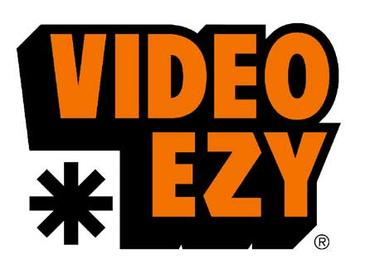

**Demo of the VideoEzy v0.03**

I will be bringing back all the features and more of VideoEzy into this.
This code is much cleaner and easier to manage for me.


1.   Write your script
2.   Install the requirements
3.   Generate your video

your video will appear in

/content/AAA_Movies/



# write your shit and produce music tracks

In [29]:
%%writefile /content/music.txt
 30 "gangsta rap music" "/content/out/music_0.wav"
 30 "rock music" "/content/out/music_1.wav"
 30 "80s pop music" "/content/out/music_2.wav"

Overwriting /content/music.txt


In [ ]:
%%writefile /content/script_bulk.txt
##Scene1##
--text
daniel Narrator "In a city where cats rule, things are about to get... fur-real quirky!"
--makevid
temp1 1
--dubvid
wav1 0
sfx1 5
--wav2lip
/content/final_video.mp4
##Finish##
##Scene2##
--makevid
temp2 1
--dubvid
wav2 0
sfx2 5
--wav2lip
/content/final_video.mp4
##Finish##
##Scene3##
--makevid
temp3 1
--dubvid
wav3 0
sfx1 5 sfx2 5
--wav2lip
/content/final_video.mp4
##Finish##

Overwriting /content/script_bulk.txt


# install the crap

In [1]:
!mkdir -p /content/fonts/ && wget -O /content/fonts/FFF_Tusj.ttf https://github.com/DragonFarts/Video-EZY/raw/main/FFF_Tusj.ttf

--2023-10-12 02:23:24--  https://github.com/DragonFarts/Video-EZY/raw/main/FFF_Tusj.ttf
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/DragonFarts/Video-EZY/main/FFF_Tusj.ttf [following]
--2023-10-12 02:23:24--  https://raw.githubusercontent.com/DragonFarts/Video-EZY/main/FFF_Tusj.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1543648 (1.5M) [application/octet-stream]
Saving to: ‘/content/fonts/FFF_Tusj.ttf’

/content/fonts/FFF_ 100%[===================>]   1.47M  --.-KB/s    in 0.009s  

2023-10-12 02:23:25 (168 MB/s) - ‘/content/fonts/FFF_Tusj.ttf’ saved [1543648/1543648]



In [2]:
# Best to make sure you have torch installed first, in particular before installing xformers.
# Don't run this if you already have PyTorch installed.
!pip install 'torch>=2.0'
# Then proceed to one of the following
!pip install -U audiocraft  # stable release
!pip install -U git+https://git@github.com/facebookresearch/audiocraft#egg=audiocraft  # bleeding edge
!pip install -e .  # or if you cloned the repo locally (mandatory if you want to train).

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 609.1/609.1 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.0/31.0 MB 55.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.4/72.4 kB 9.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.6/59.6 kB 8.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.2/125.2 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 54.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 66.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 21

  Cloning https://****@github.com/facebookresearch/audiocraft to /tmp/pip-install-w5wgdu5t/audiocraft_f47287be06ab4cc5b61f6acdfbc03823
  Running command git clone --filter=blob:none --quiet 'https://****@github.com/facebookresearch/audiocraft' /tmp/pip-install-w5wgdu5t/audiocraft_f47287be06ab4cc5b61f6acdfbc03823
  Resolved https://****@github.com/facebookresearch/audiocraft to commit a2b96756956846e194c9255d0cdadc2b47c93f1b
  Preparing metadata (setup.py) ... done
Obtaining file:///content
ERROR: file:///content does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.


In [31]:
%%writefile /content/musicgen.py
import subprocess
import sys
import os
import soundfile as sf
import numpy as np

# Uninstall the old transformers and install the latest version
#subprocess.check_call([sys.executable, "-m", "pip", "uninstall", "-y", "transformers"])
#subprocess.check_call([sys.executable, "-m", "pip", "install", "transformers"])

# Ensure the necessary imports are present after updating the transformers
import torchaudio
from audiocraft.models import MusicGen
from audiocraft.models import MultiBandDiffusion

# Initialization or loading the model (if needed)
model = MusicGen.get_pretrained('facebook/musicgen-large')

# Set generation parameters
model.set_generation_params(
    use_sampling=True,
    top_k=250
)

# Read the input file and process each line
with open('/content/music.txt', 'r') as file:
    for line in file:
        if '%%writefile' in line:
            continue  # Skip the Jupyter magic command line
        duration, prompt, output_path = line.strip().split(' ', 2)
        duration = int(duration)
        prompt = prompt.strip('"')  # Remove surrounding double quotes
        output_path = output_path.strip('"')  # Remove surrounding double quotes

        output = model.generate(
            descriptions=[prompt],
            progress=True, return_tokens=True
        )

        # Move the tensor to CPU, convert to NumPy array, and reshape
        audio_data_cpu = output[0].cpu().numpy().reshape(-1)

        # Ensure the output directory exists
        os.makedirs(os.path.dirname(output_path), exist_ok=True)

        # Save the audio to a WAV file
        sf.write(output_path, audio_data_cpu, 32000)

        print(f"Audio saved to {output_path}")


Overwriting /content/musicgen.py


In [3]:
!pip install pydub

In [4]:

!pip install -q torch==1.13.1+cu116 torchvision==0.14.1+cu116 torchaudio==0.13.1 torchtext==0.14.1 torchdata==0.5.1 --extra-index-url https://download.pytorch.org/whl/cu116 -U
!git clone https://huggingface.co/camenduru/Wav2Lip
!pip install gradio yt_dlp ffmpeg-python librosa==0.8.0
%cd Wav2Lip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 GB 519.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.2/24.2 MB 56.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 81.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 84.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
audiocraft 1.0.0 requires torch>=2.0.0, but you have torch 1.13.1+cu116 which is incompatible.
audiocraft 1.0.0 requires torchaudio>=2.0.0, but you have torchaudio 0.13.1+cu116 which is incompatible.
xformers 0.0.22 requires torch==2.0.1, but you have torch 1.13.1+cu116 which is incompatible.
Cloning into 'Wav2Lip'...
remote: Enumerating objects: 72, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing obje

In [5]:
%cd /content/

/content


In [6]:
%%writefile /content/bulk.py
import os
import subprocess

# Read the script_bulk.txt file
with open('script_bulk.txt', 'r') as f:
    content = f.read()

# Split the content by '##Finish##' to get individual scenes
scenes = content.split('##Finish##')

# Create directories if they don't exist
os.makedirs('/content/temp/', exist_ok=True)
os.makedirs('/content/TempAudio/', exist_ok=True)
os.makedirs('/content/AAA_Movies/', exist_ok=True)

# Change directory to /content/
os.chdir('/content/')

for scene in scenes:
    # Remove any leading/trailing whitespace
    scene = scene.strip()
    if not scene:
        continue

    # Extract the scene name (e.g., "Scene1") from the content
    scene_name = scene.split('##')[1]

    # Write the scene content to a new file named based on the scene name (e.g., "/content/Scene1.txt")
    scene_file_path = f'/content/{scene_name}.txt'
    with open(scene_file_path, 'w') as f:
        f.write(scene.replace(f'##{scene_name}##', '').strip())

    # Rename the scene file to script.txt
    os.rename(scene_file_path, '/content/script.txt')

    # Run the VideoEzy.py script and other commands
    subprocess.run(['python', '/content/VideoEzy.py', '$(cat script.txt)'])
    subprocess.run(['cp', '/content/final_video.mp4', f'/content/AAA_Movies/{scene_name}.mp4'])

    # Rename script.txt back to its original scene name
    os.rename('/content/script.txt', scene_file_path)

print("Files and videos created successfully!")


Writing /content/bulk.py


In [8]:
%%writefile /content/combover.py
from moviepy.editor import VideoFileClip, concatenate_videoclips, AudioFileClip, concatenate_audioclips, CompositeAudioClip
import sys
import os

def main():
    # Default directory prefix for video files only
    directory_prefix = "/content/AAA_Movies/"

    # Get the output file, audio file, and video files from command line arguments
    output_file_path = os.path.join(directory_prefix, sys.argv[1])
    audio_file_path = sys.argv[2]
    video_file_paths = [os.path.join(directory_prefix, path) for path in sys.argv[3:]]

    # Load the video files
    clips = [VideoFileClip(clip_path) for clip_path in video_file_paths]

    # Concatenate the video clips
    final_video = concatenate_videoclips(clips)

    if audio_file_path.lower() != "none":
        # Load the audio file and lower its volume
        audio = AudioFileClip(audio_file_path).volumex(0.3)

        # Loop the audio to match the duration of the concatenated video
        audio_duration = audio.duration
        video_duration = final_video.duration
        loops_required = int(video_duration // audio_duration) + 1
        looped_audio = concatenate_audioclips([audio]*loops_required)

        # Create a composite audio track that includes both the original audio and the looped music
        composite_audio = CompositeAudioClip([final_video.audio, looped_audio.subclip(0, final_video.duration)])

        # Set the composite audio to the final video
        final_video = final_video.set_audio(composite_audio)

    # Write the result to the specified output file
    final_video.write_videofile(output_file_path)

if __name__ == "__main__":
    main()


Writing /content/combover.py


In [9]:
%%writefile /content/bulkvid.py
import os
import subprocess

def run_commands(output_file, scene_name):
    os.chdir('/content/')
    os.makedirs('/content/temp/', exist_ok=True)
    os.makedirs('/content/TempAudio', exist_ok=True)
    subprocess.run(['python', '/content/VideoEzy.py', f'$(cat {output_file})'])
    os.makedirs('/content/AAA_Movies/', exist_ok=True)
    subprocess.run(['mv', '/content/final_video.mp4', f'/content/AAA_Movies/{scene_name}.mp4'])

# Read the bulk script and initialize variables
input_file = '/content/script_bulk.txt'
output_file = '/content/script.txt'
scene_name = ''
write_flag = False

with open(input_file, 'r') as f_in:
    lines = f_in.readlines()

# Loop through lines to extract scenes and run commands
for line in lines:
    if "##Scene" in line:
        if write_flag:  # Close the previous scene's file and run commands
            f_out.close()
            run_commands(output_file, scene_name)

        scene_name = line.strip().replace('##', '')  # Update scene name
        write_flag = True  # Start writing to a new file
        f_out = open(output_file, 'w')
        continue

    if write_flag:
        f_out.write(line)

# Close the last scene's file and run commands
if write_flag:
    f_out.close()
    run_commands(output_file, scene_name)

Writing /content/bulkvid.py


In [10]:
%%writefile /content/bulkvidbgmusic.py
import os
import subprocess

# Uninstall and install the required packages
os.system('pip uninstall -y torch torchaudio transformers torchvision')
os.system('pip install torch==2.0.0 torchaudio==2.0.0 transformers==4.31.0 torchvision')

os.chdir('/content/audiocraft_plus/')
# Initialize variables
input_file = '/content/script_bulk.txt'
music_command = ''

# Read the bulk script to find the "##END##" tag and music command
with open(input_file, 'r') as f_in:
    lines = f_in.readlines()
    for i, line in enumerate(lines):
        if "##END##" in line.strip():
            music_command = lines[i + 1].strip()  # Directly copy the line as it is
            break

# Print the music command for verification
print(f"Music Command: {music_command}")

# Run the music generation
if music_command:
    print("Running Music Generation")

    # Prepare the full command
    full_command = f"python /content/audiocraft_plus/musicGen {music_command}"

    # Print the full command for debugging
    print(f"Running command: {full_command}")

    # Use the command in subprocess.run()
    subprocess.run(full_command, shell=True)
    print("Music generation should have been run")


Writing /content/bulkvidbgmusic.py


In [11]:
%%writefile VideoEzy.py
import subprocess
import argparse
import os
import shutil
import random
import glob
import cv2
import copy
import gc  # Import the garbage collection module

from PIL import Image, ImageDraw, ImageFont

import numpy as np
sfxcount = 0  # Initialize your sfx count variable
output_directory = "/content/out/"
# Ensure that the output directory exists
if not os.path.exists(output_directory):
    os.makedirs(output_directory)
from moviepy.audio.fx.all import volumex
from moviepy.audio.AudioClip import AudioArrayClip

from moviepy.editor import AudioFileClip, CompositeAudioClip
from moviepy.editor import TextClip, CompositeVideoClip, VideoFileClip, concatenate_videoclips, concatenate_audioclips
from moviepy.video.fx import time_mirror
from moviepy.editor import ImageSequenceClip
from pydub import AudioSegment
from moviepy.audio.AudioClip import AudioArrayClip

def run_testpy_script(rvc_voice, wav_file_path, output_file_path):
    subprocess.run([
        "python",
        "/content/test.py",
        "--name", rvc_voice,  # Only rvc_voice is passed here
        "--f0_up_key", "0",
        "--input_path", wav_file_path,
        "--out", output_file_path
    ])


def overlay_text_on_video(video_path, text, output_path):
    cap = cv2.VideoCapture(video_path)
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, 30.0, (int(cap.get(3)), int(cap.get(4))))

    while cap.isOpened():
        ret, frame = cap.read()
        if ret:
            pil_im = Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
            draw = ImageDraw.Draw(pil_im)

            # Define a larger font size and get a suitable font
            font_size = 48
            font = ImageFont.truetype("/content/fonts/FFF_Tusj.ttf", font_size)

            # Calculate text size and position to center it
            text_width, text_height = draw.textsize(text, font=font)
            frame_width, frame_height = pil_im.size
            text_x = (frame_width - text_width) // 2
            text_y = (frame_height - text_height) // 2

            draw.text((text_x, text_y), text, font=font, fill=(255, 255, 255))

            frame = cv2.cvtColor(np.array(pil_im), cv2.COLOR_RGB2BGR)
            out.write(frame)
        else:
            break

    cap.release()
    out.release()
    cv2.destroyAllWindows()

def overlay_audio_arrays(array1, array2):
    # Make sure both arrays have the same shape
    length_diff = len(array1) - len(array2)
    if length_diff > 0:
        array2 = np.pad(array2, [(0, length_diff), (0, 0)], 'constant')
    elif length_diff < 0:
        array1 = np.pad(array1, [(0, -length_diff), (0, 0)], 'constant')

    # Overlay the audio
    return array1 + array2


def combine_audio_files(dubvid_info, index):
    combined_audio = AudioSegment.empty()
    for wav, silence in zip(dubvid_info[::2], dubvid_info[1::2]):
        audio = AudioSegment.from_wav(f"/content/out/{wav}.wav")
        combined_audio += audio + AudioSegment.silent(duration=int(float(silence) * 1000))
    combined_audio.export(f"/content/combined_audio_{index}.wav", format="wav")
    return combined_audio


def make_video(gif_loop_info, output_path):
    clips = []
    for gif, loops in zip(gif_loop_info[::2], gif_loop_info[1::2]):
        clip = VideoFileClip(f"/content/Hotshot-XL/{gif}.gif")
        clips.extend([clip] * int(loops))

    try:
        final_clip = concatenate_videoclips(clips)
        final_clip.write_videofile(output_path)
    except IndexError:
        print("IndexError: One of the clips is too short for the concatenation.")


def reverse_and_append_gif(gif_path):
    clip = VideoFileClip(gif_path)
    reversed_clip = time_mirror.time_mirror(clip)
    final_clip = concatenate_videoclips([clip, reversed_clip])
    final_clip.write_gif(gif_path)

def read_arguments_from_file(file_path):
    args = {}
    current_key = None
    with open(file_path, 'r') as f:
        for line in f:
            line = line.strip()
            if not line:
                continue
            if line.startswith("--"):
                current_key = line.split()[0]
                args[current_key] = []
            else:
                args[current_key].append(line)
    return args





def find_and_copy_wav_file(src_dir="/content/temp/", dest_dir="/content/temp/"):
    for filename in os.listdir(src_dir):
        if filename.endswith(".wav"):
            src_path = os.path.join(src_dir, filename)
            wav_num = 1
            dest_filename = f"wav{wav_num}.wav"
            dest_path = os.path.join(dest_dir, dest_filename)

            while os.path.exists(dest_path):
                wav_num += 1
                dest_filename = f"wav{wav_num}.wav"
                dest_path = os.path.join(dest_dir, dest_filename)

            shutil.copy(src_path, dest_path)
            break


def main(voice_texts, genvids, makevid_info, dubvid_infos, sfxgen, addtxt, wav2lip=None):
    os.chdir("/content")
    global sfxcount  # Declare sfxcount as a global variable within the function

    with open("/content/script.txt", "r") as f:
        lines = f.readlines()

    sfx_args = [line.split('--sfxgen ')[1].strip().strip('"') for line in lines if '--sfxgen' in line]


    for sfxgen in sfx_args:
        if sfxgen:
            subprocess.run([
                'audioldm2', '-t', sfxgen, '--model_name', 'audioldm_48k', '--save_path', '/content/sfxout'
            ])

            # Assuming the new file is saved in a timestamped folder under /content/sfxout
            newest_subfolder = max(glob.glob(os.path.join('/content/sfxout', '*/')), key=os.path.getmtime)

            # Assuming there's only one wav file in the timestamped subfolder
            wav_file = glob.glob(os.path.join(newest_subfolder, '*.wav'))[0]

            sfxcount += 1
            new_file_path = os.path.join('/content/out', f"sfx{sfxcount}.wav")

            shutil.copy(wav_file, new_file_path)

    if genvids:

        # First clone and setup Hotshot-XL
        subprocess.run(["pip", "uninstall", "-y", "torch", "torchvision", "torchaudio"])
        subprocess.run(["pip", "install", "torch==2.0.1", "torchvision==0.15.2", "torchaudio==2.0.2", "-f", "https://download.pytorch.org/whl/cu111/torch_stable.html"])
        subprocess.run(["pip", "uninstall", "-y", "transformers"])
        subprocess.run(["pip", "install", "transformers>=4.33.3"])
        subprocess.run(["git", "clone", "-b", "dev", "https://github.com/camenduru/Hotshot-XL"])
        os.chdir("/content/Hotshot-XL")
        subprocess.run(["pip", "install", "-q", "accelerate"])
        subprocess.run(["pip", "install", "-q", "."])



        # Initialize counter before entering loop
        counter = 1

        # Generate GIFs
        for genvid, num_gifs in genvids:
            for i in range(1, int(num_gifs) + 1):
                output_filename = f"temp{counter}.gif"
                # Generate a random seed
                random_seed = random.randint(-10000, 10000)  # You can set the range as per your needs
                subprocess.run(["python", "inference.py", f"--seed={random_seed}", "--prompt", genvid, "--output", output_filename])

                # Reverse and append to each of the GIFs
                reverse_and_append_gif(output_filename)

                # Increment the counter
                counter += 1


        os.chdir("/content")
        # Install moviepy (if not already installed)
        subprocess.run(["pip", "install", "moviepy"])

    if voice_texts:
        # Now setup and run tortoise-hf
        subprocess.run(["pip", "uninstall", "-y", "torch", "torchvision", "torchaudio"])
        subprocess.run(["pip", "install", "torch", "torchvision", "torchaudio", "-f", "https://download.pytorch.org/whl/cu111/torch_stable.html"])
        subprocess.run(["git", "clone", "-b", "dev", "https://github.com/camenduru/tortoise-hf"])
        os.chdir("/content/tortoise-hf")
        subprocess.run(["git", "clone", "-b", "v1.0", "https://github.com/camenduru/tortoise-tts"])
        subprocess.run(["pip", "install", "gradio", "scipy", "-U"])
        os.chdir("/content/tortoise-hf/tortoise-tts")
        subprocess.run(["pip", "uninstall", "-y", "transformers"])
        subprocess.run(["pip", "install", "transformers==4.19.0"])
        subprocess.run(["pip", "install", "-r", "requirements.txt"])
        subprocess.run(["python", "setup.py", "install"])

        move_wav_counter = 1

        wav_counter = 1  # Initialize counter for wav files
        for voice, rvc_voice, text in voice_texts:


            subprocess.run(["python3", "/content/tortoise-hf/tortoise-tts/tortoise/do_tts.py", "--text", text, "--voice", voice, "--preset", "high_quality", "--output", "/content/TempAudio", "--candidates", "1"])
            find_and_copy_wav_file("/content/TempAudio", "/content/temp")
            wav_file_path = f"/content/temp/wav{wav_counter}.wav"
            output_file_path = f"/content/temp/wav{wav_counter}_temp.wav"

            if rvc_voice != 'none':
                os.chdir("/content/")
                run_testpy_script(rvc_voice, wav_file_path, output_file_path)
                os.rename(output_file_path, wav_file_path)
                os.chdir("/content/tortoise-hf/tortoise-tts")

            # After all operations are done on the current wav_file
            while os.path.exists(f"/content/out/wav{move_wav_counter}.wav"):
                move_wav_counter += 1

            shutil.move(wav_file_path, f"/content/out/wav{move_wav_counter}.wav")




    if makevid_info:
        make_video(makevid_info, "/content/output_video.mp4")
            # Use shutil to copy and replace files after Wav2Lip inference
        shutil.copy('/content/output_video.mp4', '/content/final_video.mp4')


    if addtxt:
        overlay_text_on_video("/content/output_video.mp4", addtxt, "/content/output_video_with_text.mp4")
        shutil.copy("/content/output_video_with_text.mp4", "/content/output_video.mp4")






















    if dubvid_infos:
        video = VideoFileClip("/content/output_video.mp4")
        original_audio = video.audio

        if original_audio is None:
            blank_audio = AudioArrayClip(np.zeros((int(video.duration * 44100), 2)), fps=44100)
            original_audio = blank_audio.set_duration(video.duration)

        combined_audio_list = []
        volume_multiplier = 1.0  # Initial volume level for the first dub

        for i, dubvid_info in enumerate(dubvid_infos):
            combine_audio_files(dubvid_info, i)
            new_audio = AudioFileClip(f"/content/combined_audio_{i}.wav")
            new_audio = new_audio.volumex(volume_multiplier)  # Adjust the volume
            combined_audio_list.append(new_audio)
            volume_multiplier *= 0.3  # Reduce volume by 30% for the next dub

        final_audio_clips = [original_audio] + combined_audio_list

        print("Final audio clips list: ", final_audio_clips)  # Debug print

        final_combined_audio = CompositeAudioClip(final_audio_clips)

        final_video = video.set_audio(final_combined_audio)
        final_video.write_videofile("/content/final_video.mp4", audio_codec='aac')

    if wav2lip:
        # Change working directory
        os.chdir('/content/Wav2Lip/')

        # Use ffmpeg to extract audio from the video file into wav1.mp3
        subprocess.run(['ffmpeg', '-i', wav2lip, '-q:a', '0', '-map', 'a', '/content/out/wav1.mp3', '-y'])

        # Determine file extension (gif or mp4)
        file_extension = os.path.splitext(wav2lip)[-1]

        if file_extension == '.gif':
            # Use ffmpeg to increase the frame rate to 30fps by repeating frames for GIF
            subprocess.run(['ffmpeg', '-i', '/content/temp2.gif', '-vf', 'fps=30', '/content/temp2_30fps.gif', '-y'])
            face_file = '/content/temp2_30fps.gif'
        elif file_extension == '.mp4':
            # Use ffmpeg to increase the frame rate to 30fps by repeating frames for MP4
            subprocess.run(['ffmpeg', '-i', wav2lip, '-vf', 'fps=30', '/content/temp2_30fps.mp4', '-y'])
            face_file = '/content/temp2_30fps.mp4'

        # Run the Wav2Lip inference
        subprocess.run([
            'python', 'inference.py',
            '--checkpoint_path', 'checkpoints/wav2lip_gan.pth',
            '--face', face_file,
            '--audio', '/content/out/wav1.mp3'
        ])

    # Use shutil to copy and replace files after Wav2Lip inference
    shutil.copy('/content/Wav2Lip/results/result_voice.mp4', '/content/final_video.mp4')
    shutil.copy('/content/Wav2Lip/results/result_voice.mp4', '/content/output_video.mp4')
    os.remove('/content/Wav2Lip/results/result_voice.mp4')
if __name__ == "__main__":
    parser = argparse.ArgumentParser()

    args_dict = read_arguments_from_file('script.txt')

    voice_texts = [(x.split()[0], x.split()[1], " ".join(x.split()[2:])) for x in args_dict.get('--text', [])]

    genvids = [(x.rsplit(' ', 1)[0], x.rsplit(' ', 1)[1]) for x in args_dict.get('--genvid', [])]
    makevid_info = args_dict.get('--makevid', [])[0].split() if args_dict.get('--makevid', []) else None
    sfxgen = args_dict.get('--sfxgen', [])[0] if args_dict.get('--sfxgen', []) else None
    dubvid_infos = []
    if '--dubvid' in args_dict:
        for line in args_dict['--dubvid']:
            dubvid_infos.append(line.split())
    # Add the argument for overlaying text
    addtxt = args_dict.get('--addtxt', [])[0] if args_dict.get('--addtxt', []) else None
    wav2lip = args_dict.get('--wav2lip', [])[0] if args_dict.get('--wav2lip', []) else None

    main(voice_texts, genvids, makevid_info, dubvid_infos, sfxgen, addtxt, wav2lip)


Writing VideoEzy.py


**RVC**

In [12]:
%cd /content/
!pip3 install --pre torch torchvision torchaudio --index-url https://download.pytorch.org/whl/nightly/cu121
!pip install pyttsx3
!pip install sounddevice
!pip install soundfile
!sudo apt-get update
!sudo apt-get install aria2
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/lj1995/VoiceConversionWebUI/resolve/main/hubert_base.pt -d /content/ -o hubert_base.pt
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/lj1995/VoiceConversionWebUI/resolve/main/rmvpe.pt -d /content/ -o rmvpe.pt
!pip install -e git+https://github.com/JarodMica/rvc.git#egg=rvc
!pip install -e git+https://github.com/JarodMica/rvc-tts-pipeline.git#egg=rvc_tts_pipe
import sys
sys.path.append('/content/src/rvc')
sys.path.append('/content/src/rvc-tts-pipe')

/content
Looking in indexes: https://download.pytorch.org/whl/nightly/cu121
Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:6 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Get:7 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,004 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Get:10 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1,081 kB]
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-updat

In [13]:
from rvc_infer import rvc_convert

    PyTorch 2.0.1+cu118 with CUDA 1108 (you have 1.13.1+cu116)
    Python  3.10.13 (you have 3.10.12)
  Please reinstall xformers (see https://github.com/facebookresearch/xformers#installing-xformers)
  Memory-efficient attention, SwiGLU, sparse and more won't be available.
  Set XFORMERS_MORE_DETAILS=1 for more details


In [14]:
%%writefile test.py
import argparse
import os
import time
import shutil
import glob
from rvc_infer import rvc_convert

def find_paths(keyword, base_folder):
    for root, dirs, files in os.walk(base_folder):
        if keyword in root:
            index_files = glob.glob(os.path.join(root, '*.index'))
            pth_files = glob.glob(os.path.join(root, '*.pth'))
            if index_files and pth_files:
                return pth_files[0], index_files[0]
    return None, None

def copy_output_file(src, dest):
    try:
        shutil.copy(src, dest)
        print(f"File copied from {src} to {dest}")
    except Exception as e:
        print(f"An error occurred while copying: {e}")

if __name__ == "__main__":
    parser = argparse.ArgumentParser()
    parser.add_argument("--name", required=True)
    parser.add_argument("--f0_up_key", required=True)
    parser.add_argument("--input_path", required=True)
    parser.add_argument("--out", required=True)
    args = parser.parse_args()

    base_folder = '/content/#voicervc/'

    model_path, file_index = find_paths(args.name, base_folder)

    if model_path and file_index:
        # Call rvc_convert function
        rvc_convert(model_path=model_path, file_index=file_index, f0_up_key=int(args.f0_up_key), input_path=args.input_path)

        # Wait for 0.25 seconds to ensure the output file is ready
        time.sleep(0.25)

        # Copy file
        default_output_path = "/content/output/out.wav"
        copy_output_file(default_output_path, args.out)
    else:
        print(f"No matching .pth and .index files found for {args.name} in {base_folder}")


Writing test.py


In [15]:
%%writefile RVC-dl.py
import requests
import zipfile
import io
import os
import sys
import re
import gdown
import time



def resolve_hugging_face_url(zip_url):
    response = requests.head(zip_url, allow_redirects=True)
    if response.status_code == 200:
        return response.url
    else:
        return None

def extract_google_drive(file_id, target_directory):
    temp_zip_path = "/content/temp_google_drive.zip"
    gdown.download(f"https://drive.google.com/uc?id={file_id}", temp_zip_path, quiet=False)

    with zipfile.ZipFile(temp_zip_path, 'r') as zip_ref:
        for file_info in zip_ref.infolist():
            if not file_info.is_dir():  # Only extract files
                file_info.filename = os.path.basename(file_info.filename)
                zip_ref.extract(file_info, target_directory)

    os.remove(temp_zip_path)
    print("ZIP file downloaded and extracted successfully from Google Drive.")

def extract_zip(zip_url, target_directory):
    os.makedirs(target_directory, exist_ok=True)

    if "drive.google.com" in zip_url:
        file_id_search = re.search(r"/file/d/([a-zA-Z0-9_-]+)/", zip_url)
        if file_id_search:
            file_id = file_id_search.group(1)
            extract_google_drive(file_id, target_directory)
        else:
            print("Invalid Google Drive URL.")
        return

    if "huggingface.co" in zip_url:
        zip_url = resolve_hugging_face_url(zip_url)
        if zip_url is None:
            print("Failed to resolve Hugging Face URL.")
            return

    response = requests.get(zip_url)
    if response.status_code == 200:
        with zipfile.ZipFile(io.BytesIO(response.content), 'r') as zip_ref:
            for file_info in zip_ref.infolist():
                if not file_info.is_dir():  # Only extract files
                    file_info.filename = os.path.basename(file_info.filename)
                    zip_ref.extract(file_info, target_directory)
        print("ZIP file downloaded and extracted successfully.")
    else:
        print("Failed to download ZIP file.")

if __name__ == "__main__":
    if len(sys.argv) != 3:
        print("Usage: python RVC-dl.py <target_directory> <zip_url>")
    else:
        target_directory = sys.argv[1]
        zip_url = sys.argv[2]
        extract_zip(zip_url, target_directory)


Writing RVC-dl.py


In [16]:
!python RVC-dl.py "/content/#voicervc/Narrator/" "https://huggingface.co/SyberGen/DragonBallVModels/resolve/main/DBZNarratorENG.zip"


ZIP file downloaded and extracted successfully.


In [17]:
#!python "/content/test.py" --name="Narrator" --f0_up_key=0 --input_path="/content/out/daniel_0.wav" --out="/content/worked.wav"


**Audioldm**

In [18]:
!pip uninstall -y torch torchaudio transformers
!pip install torch==2.0.0 torchaudio==2.0.0 transformers==4.30.2

Found existing installation: torch 1.13.1+cu116
Uninstalling torch-1.13.1+cu116:
  Successfully uninstalled torch-1.13.1+cu116
Found existing installation: torchaudio 0.13.1+cu116
Uninstalling torchaudio-0.13.1+cu116:
  Successfully uninstalled torchaudio-0.13.1+cu116
Found existing installation: transformers 4.34.0
Uninstalling transformers-4.34.0:
  Successfully uninstalled transformers-4.34.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 990.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 103.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 113.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 76.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 65.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 114.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [19]:
%cd /content
!git clone -b dev https://github.com/camenduru/AudioLDM_48K_Text-to-HiFiAudio_Generation-hf /content/audioldm2
!pip install -q git+https://github.com/huggingface/diffusers
!pip install -q git+https://github.com/camenduru/AudioLDM2@v1.0
!pip install -q transformers==4.30.2 huggingface_hub timm gradio
!sudo apt-get install espeak
%cd /content/audioldm2

/content
Cloning into '/content/audioldm2'...
remote: Enumerating objects: 53, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 53 (delta 27), reused 37 (delta 17), pack-reused 0
Receiving objects: 100% (53/53), 20.18 KiB | 2.02 MiB/s, done.
Resolving deltas: 100% (27/27), done.
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.3/214.3 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.6/90.6 kB 12.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 61.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [20]:
#%cd /content/audioldm2/
#!audioldm2 -t "A cat meowing" --model_name=audioldm_48k --save_path /content/temp/sfx1.wav

In [21]:
%%writefile /content/sfxgen.py
import os
import subprocess
os.chdir("/content/audioldm2/")


subprocess.run([
    "audioldm2",
    "-t",
    "A cat meowing",
    "--model_name=audioldm_48k",
    "--duration",
    "3",
    "--save_path",
    "/content/temp/sfx1.wav"
])

Writing /content/sfxgen.py


# Generate your dung video!

In [ ]:
%cd /content/
!python /content/bulk.py

In [ ]:
!python /content/musicgen.py
#!python /content/combover.py Movie1.mp4 /content/out/music_0.wav Scene1.mp4 Scene2.mp4 Scene3.mp4
#!python /content/combover.py Movie1.mp4 none Scene1.mp4 Scene2.mp4 Scene3.mp4

2023-10-12 02:50:42.140305: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-12 02:50:44.026636: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-10-12 02:50:46.498333: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-12 02:50:46.498975: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returnin

# **Voice Video Rip**

In [ ]:
!pip install yt_dlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.4/194.4 kB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 85.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 75.8 MB/s eta 0:00:00


In [ ]:
%%writefile /content/autodl.py
import argparse
import shutil
import os
from yt_dlp import YoutubeDL
from moviepy.editor import *
from glob import glob
from tqdm import tqdm
from numpy import arange as np_arange
from datetime import timedelta, datetime

# Parameters for frame extraction
SAVING_FRAMES_PER_SECOND = 30

def extract_frames(video_file):
    video_clip = VideoFileClip(video_file)
    filename, _ = os.path.splitext(video_file)
    if not os.path.isdir(filename):
        os.mkdir(filename)
    saving_frames_per_second = min(video_clip.fps, SAVING_FRAMES_PER_SECOND)
    step = 1 / video_clip.fps if saving_frames_per_second == 0 else 1 / saving_frames_per_second
    for current_duration in tqdm(np_arange(0, video_clip.duration, step), desc="Extracting video frames"):

        frame_duration_formatted = format_timedelta(timedelta(seconds=current_duration)).replace(":", "-")
        frame_filename = os.path.join(filename, f"frame{frame_duration_formatted}.jpg")
        video_clip.save_frame(frame_filename, current_duration)
    return filename, video_clip.fps

def reverse_video(frames_path, video_fps):
    frame_files = glob(os.path.join(frames_path, "*"))
    frame_files.sort(key=lambda d: datetime.strptime(d.split("frame")[1], "%H-%M-%S.%f.jpg"), reverse=True)
    saving_frames_per_second = min(video_fps, SAVING_FRAMES_PER_SECOND)
    if saving_frames_per_second == 0:
        saving_frames_per_second = video_fps
    image_sequence_clip = ImageSequenceClip(frame_files, fps=saving_frames_per_second)
    output_filename = f"{frames_path}-inverted.mp4"
    image_sequence_clip.write_videofile(output_filename, codec='libx264', audio_codec='aac')
    shutil.rmtree(frames_path)
    return output_filename
def format_timedelta(td):
    """Utility function to format timedelta objects in a cool way (e.g 00:00:20.05)
    omitting microseconds and retaining milliseconds"""
    result = str(td)
    try:
        result, ms = result.split(".")
    except ValueError:
        return result + ".00".replace(":", "-")
    ms = int(ms)
    ms = round(ms / 1e4)
    return f"{result}.{ms:02}".replace(":", "-")

def download_video(name, youtubelink, timestamp_start, timestamp_end, reverse_flag):
    output_template = f'/content/vids/{name}.mp4'
    options = {
        'overwrites': True,
        'format': 'bestvideo[ext=mp4]',
        'outtmpl': output_template,
        'postprocessor_args': ['-ss', timestamp_start, '-to', timestamp_end, '-c', 'copy']
    }

    with YoutubeDL(options) as ydl:
        ydl.download([youtubelink])

    if reverse_flag:
        frames_folder_path, video_fps = extract_frames(output_template)
        reverse_video(frames_folder_path, video_fps)
    shutil.move("/content/vids/jim-inverted.mp4", "/content/vids/jim.mp4")

if __name__ == "__main__":
    parser = argparse.ArgumentParser(description="Download videos from YouTube with specific options.")
    parser.add_argument("name", help="Name of the video file.")
    parser.add_argument("youtubelink", help="YouTube link to download.")
    parser.add_argument("timestamp_start", help="Start timestamp for the video download.")
    parser.add_argument("timestamp_end", help="End timestamp for the video download.")
    parser.add_argument("-r", "--reverse", help="Flag to append a reversed version of the video.", action="store_true")

    args = parser.parse_args()
    download_video(args.name, args.youtubelink, args.timestamp_start, args.timestamp_end, args.reverse)


Writing /content/autodl.py


In [ ]:
!python /content/autodl.py jim "https://youtu.be/78SgHHz6kuQ?si=z1vjg2yi42w2nSXi" 00:00:00 00:00:22 -r

error: XDG_RUNTIME_DIR not set in the environment.
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1334:(snd_func_refer) error evaluating name
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5701:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM default
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evalu

audioripquick

In [ ]:
%%writefile /content/audrip.py
import sys
import os
from yt_dlp import YoutubeDL

def download_video_segment(youtube_link, start_time, end_time, index):
    options = {
        'overwrites': True,
        'format': 'bestvideo[ext=mp4]+bestaudio[ext=m4a]/mp4',
        'outtmpl': f'/content/segment_{index}.%(ext)s',
        'postprocessor_args': ['-ss', start_time, '-to', end_time, '-c', 'copy'],
    }
    with YoutubeDL(options) as ydl:
        ydl.download([youtube_link])

    # Convert downloaded segment to mp3
    os.system(f'ffmpeg -i /content/segment_{index}.mp4 -q:a 0 -map a /content/segment_{index}.mp3')

if __name__ == "__main__":
    filename, youtube_link, *timestamps = sys.argv[1:]

    # Ensure there's an even number of timestamps for start and end pairs
    if len(timestamps) % 2 != 0:
        print("Please provide an even number of timestamps for start and end pairs.")
        sys.exit(1)

    # Check if directory exists, if not create it
    if not os.path.exists("/content/#voicemp3"):
        os.makedirs("/content/#voicemp3")

    # Download segments
    for i in range(0, len(timestamps), 2):
        download_video_segment(youtube_link, timestamps[i], timestamps[i+1], i//2)

    # Concatenate MP3s
    mp3_files = [f"/content/segment_{i}.mp3" for i in range(len(timestamps) // 2)]
    output_file = f"/content/#voicemp3/{filename}.mp3"
    os.system(f'ffmpeg -i "concat:{"|".join(mp3_files)}" -acodec copy {output_file}')

    # Remove segment files
    for mp3_file in mp3_files:
        os.remove(mp3_file)
    for mp4_file in [f"/content/segment_{i}.mp4" for i in range(len(timestamps) // 2)]:
        os.remove(mp4_file)


Writing /content/audrip.py


In [ ]:
!python /content/audrip.py jim https://youtu.be/guRbfQFddfg?si=XQ-C29AT8stFiJOM 00:00:11 00:02:14

[youtube] Extracting URL: https://youtu.be/guRbfQFddfg?si=XQ-C29AT8stFiJOM
[youtube] guRbfQFddfg: Downloading webpage
[youtube] guRbfQFddfg: Downloading ios player API JSON
[youtube] guRbfQFddfg: Downloading android player API JSON
[youtube] guRbfQFddfg: Downloading m3u8 information
[info] guRbfQFddfg: Downloading 1 format(s): 616+140
[hlsnative] Downloading m3u8 manifest
[hlsnative] Total fragments: 73
[download] Destination: /content/segment_0.f616.mp4
[download] 100% of   65.34MiB in 00:00:13 at 4.99MiB/s
[download] Destination: /content/segment_0.f140.m4a
[download] 100% of    5.71MiB in 00:00:00 at 23.69MiB/s
[Merger] Merging formats into "/content/segment_0.mp4"
Deleting original file /content/segment_0.f616.mp4 (pass -k to keep)
Deleting original file /content/segment_0.f140.m4a (pass -k to keep)
ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0

# **STEP3 - Transfer voices for Tortoise-tts**
rerun if you install a more voices

In [ ]:
!pip install pydub
from pydub import AudioSegment
import os

# Iterate over all mp3 files in the source directory
for filename in os.listdir("/content/#voicemp3"):
    if filename.endswith(".mp3"):
        # Load the MP3 file
        audio_path = os.path.join("/content/#voicemp3", filename)
        audio = AudioSegment.from_mp3(audio_path)

        # Define the duration for each segment in milliseconds (10 seconds = 10000 milliseconds)
        duration_per_segment = 10000

        # Calculate the number of segments
        num_segments = len(audio) // duration_per_segment + (1 if len(audio) % duration_per_segment else 0)

        # Create a new directory for the split files, named after the mp3 file
        new_dir = os.path.join("/content/tortoise-hf/tortoise-tts/tortoise/voices", filename.rsplit(".", 1)[0])
        os.makedirs(new_dir, exist_ok=True)

        # Split the audio and save each segment
        for i in range(num_segments):
            start_time = i * duration_per_segment
            end_time = (i+1) * duration_per_segment
            segment = audio[start_time:end_time]
            segment.export(f"{new_dir}/{i+1}.wav", format="wav")
            print(f"Saved segment {i+1}.wav for {filename}")

print("All segments saved successfully!")

Saved segment 1.wav for jim.mp3
Saved segment 2.wav for jim.mp3
Saved segment 3.wav for jim.mp3
Saved segment 4.wav for jim.mp3
Saved segment 5.wav for jim.mp3
Saved segment 6.wav for jim.mp3
Saved segment 7.wav for jim.mp3
Saved segment 8.wav for jim.mp3
Saved segment 9.wav for jim.mp3
Saved segment 10.wav for jim.mp3
Saved segment 11.wav for jim.mp3
Saved segment 12.wav for jim.mp3
Saved segment 13.wav for jim.mp3
All segments saved successfully!


# Wav2Lip

In [ ]:
!pip install -q torch==1.13.1+cu116 torchvision==0.14.1+cu116 torchaudio==0.13.1 torchtext==0.14.1 torchdata==0.5.1 --extra-index-url https://download.pytorch.org/whl/cu116 -U
!git clone https://huggingface.co/camenduru/Wav2Lip
!pip install gradio yt_dlp ffmpeg-python librosa==0.8.0
%cd Wav2Lip

In [ ]:
%cd /content/Wav2Lip/
!python inference.py --checkpoint_path checkpoints/wav2lip_gan.pth --face "/content/Hotshot-XL/temp1.gif" --audio "/content/out/wav2.wav"

/content/Wav2Lip
Using cuda for inference.
Reading video frames...
Number of frames available for inference: 14
(80, 285)
Length of mel chunks: 35
  0% 0/1 [00:00<?, ?it/s]
  0% 0/1 [00:00<?, ?it/s]
100% 1/1 [00:13<00:00, 13.81s/it]
Load checkpoint from: checkpoints/wav2lip_gan.pth
Model loaded
100% 1/1 [00:21<00:00, 21.21s/it]
ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libm

In [ ]:
from IPython.display import HTML
from base64 import b64encode
mp4 = open('/content/Wav2Lip/results/result_voice.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML(f"""
<video width="50%" height="50%" controls>
      <source src="{data_url}" type="video/mp4">
</video>""")

# **MusicGen** (Coming soon the the PipeLine)

In [1]:
# Best to make sure you have torch installed first, in particular before installing xformers.
# Don't run this if you already have PyTorch installed.
!pip install 'torch>=2.0'
# Then proceed to one of the following
!pip install -U audiocraft  # stable release
!pip install -U git+https://git@github.com/facebookresearch/audiocraft#egg=audiocraft  # bleeding edge
!pip install -e .  # or if you cloned the repo locally (mandatory if you want to train).

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 609.1/609.1 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.0/31.0 MB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.4/72.4 kB 9.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.6/59.6 kB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.2/125.2 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 56.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 85.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 31

  Cloning https://****@github.com/facebookresearch/audiocraft to /tmp/pip-install-6hv8oklx/audiocraft_e60429bbaf734a9fab2b2b5119ce8b23
  Running command git clone --filter=blob:none --quiet 'https://****@github.com/facebookresearch/audiocraft' /tmp/pip-install-6hv8oklx/audiocraft_e60429bbaf734a9fab2b2b5119ce8b23
  Resolved https://****@github.com/facebookresearch/audiocraft to commit a2b96756956846e194c9255d0cdadc2b47c93f1b
  Preparing metadata (setup.py) ... done
Obtaining file:///content
ERROR: file:///content does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.


In [20]:
%%writefile /content/musicgen.py
import sys
import os
import soundfile as sf
import numpy as np
import torchaudio

# Ensure the necessary imports are present
from audiocraft.models import MusicGen
from audiocraft.models import MultiBandDiffusion

# Check the number of arguments provided
if len(sys.argv) != 4:
    print("Usage: !python musicgen.py <duration> \"<prompt>\" \"<output_path>\"")
    sys.exit(1)

# Extract the command-line arguments
duration = int(sys.argv[1])
prompt = sys.argv[2].strip('"')  # Remove surrounding double quotes
output_path = sys.argv[3].strip('"')  # Remove surrounding double quotes

# Initialization or loading the model (if needed)
model = MusicGen.get_pretrained('facebook/musicgen-large')

# Set generation parameters
model.set_generation_params(
    use_sampling=True,
    top_k=250,
    duration=duration
)

output = model.generate(
    descriptions=[prompt],
    progress=True, return_tokens=True
)

# Move the tensor to CPU, convert to NumPy array, and reshape
audio_data_cpu = output[0].cpu().numpy().reshape(-1)

# Ensure the output directory exists
os.makedirs(os.path.dirname(output_path), exist_ok=True)

# Save the audio to a WAV file
sf.write(output_path, audio_data_cpu, 32000)

print(f"Audio saved to {output_path}")


Overwriting /content/musicgen.py


In [21]:
!python musicgen.py 30 "gangsta rap music" "/content/out/music.wav"

2023-10-12 02:10:44.459607: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-12 02:10:45.743708: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-10-12 02:10:48.561132: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-12 02:10:48.562157: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returnin

In [3]:
%cd /content/audiocraft_plus

/content/audiocraft_plus
